In [ ]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
from scipy.stats import chi2

# Load data from CSV
data = pd.read_csv('newtonmethod.csv')
x_data = data['xaxis1']  
y_data = data['yaxis1']  

# Define functions for fitting
def hyperbola(x, a, b):
    return a * x / (x + b)

def logarithmic(x, a, b):
    return a * np.log(x) + b

def exponential(x, a, b):
    return a * np.exp(-b * x)

# List of functions to try
functions = {
    "Hyperbola": hyperbola,
    "Logarithmic": logarithmic,
    "Exponential": exponential
}

# Fit each function and calculate Residual Sum of Squares and p-values
results = []
for name, func in functions.items():
    try:
        # Fit data
        params, _ = curve_fit(func, x_data, y_data)
        residuals = y_data - func(x_data, *params)
        rss = np.sum(residuals ** 2)

        # Calculate p-value
        n = len(y_data)
        p = len(params)
        p_value = 1 - chi2.cdf(rss, n - p)

        # Store results with coefficients
        results.append((name, params, rss, p_value))
    except Exception as e:
        print(f"Could not fit {name} function: {e}")

# Display results
for result in results:
    name, params, rss, p_value = result
    coef_str = ", ".join([f"{param:.5f}" for param in params])
    print(f"Function: {name}, Coefficients: [{coef_str}], RSS: {rss:.5f}, p-value: {p_value:.5f}")


Function: Hyperbola, Coefficients: [0.42116, 0.17570], RSS: 0.02344, p-value: 1.00000
Function: Logarithmic, Coefficients: [0.07988, 0.35669], RSS: 0.02475, p-value: 1.00000
Function: Exponential, Coefficients: [0.23892, -0.35684], RSS: 0.03958, p-value: 1.00000


In [ ]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
from scipy.stats import chi2
import matplotlib.pyplot as plt

In [ ]:
# Load Alfentanil dose-effectiveness data
dose_data = pd.read_csv('newtonmethod.csv')  # Replace with actual file name
x_dose = dose_data['xaxis1']  # Column for dose values
y_effectiveness = dose_data['yaxis1']  # Column for effectiveness values

# Load Quinidine time-concentration data
time_data = pd.read_csv('newtonmethod.csv')  # Replace with actual file name
x_time = time_data['xaxis2']  # Column for time values
y_concentration = time_data['yaxis2']  # Column for concentration values


In [7]:
# Dose-Effectiveness Functions
def hyperbolic(x, a, b):
    return a * x / (x + b)

# Time-Concentration Functions
def exponential(x, a, b):
    return a * np.exp(-b * x)

In [8]:
def fit_and_evaluate(x_data, y_data, func):
    # Fit the data
    params, _ = curve_fit(func, x_data, y_data)
    
    # Calculate RSS
    residuals = y_data - func(x_data, *params)
    rss = np.sum(residuals ** 2)
    
    # Calculate p-value
    n = len(y_data)
    p = len(params)
    p_value = 1 - chi2.cdf(rss, n - p)
    
    return params, rss, p_value

In [9]:
# Dose-Effectiveness Study
params_hyperbolic, rss_hyperbolic, p_value_hyperbolic = fit_and_evaluate(x_dose, y_effectiveness, hyperbolic)

# Time-Concentration Study
params_exponential, rss_exponential, p_value_exponential = fit_and_evaluate(x_time, y_concentration, exponential)

# Display Results
print("Dose-Effectiveness Study (Hyperbolic Model)")
print(f"Parameters: a = {params_hyperbolic[0]:.5f}, b = {params_hyperbolic[1]:.5f}")
print(f"RSS: {rss_hyperbolic:.5f}, p-value: {p_value_hyperbolic:.5f}\n")

print("Time-Concentration Study (Exponential Model)")
print(f"Parameters: a = {params_exponential[0]:.5f}, b = {params_exponential[1]:.5f}")
print(f"RSS: {rss_exponential:.5f}, p-value: {p_value_exponential:.5f}")

Dose-Effectiveness Study (Hyperbolic Model)
Parameters: a = 0.42116, b = 0.17570
RSS: 0.02344, p-value: 1.00000

Time-Concentration Study (Exponential Model)
Parameters: a = 0.40969, b = 0.47637
RSS: 0.02753, p-value: 1.00000


In [10]:
C0 = params_exponential[0]
elimination_constant = params_exponential[1]
print(f"Initial concentration (C0): {C0}")
print(f"Elimination constant: {elimination_constant}")

Initial concentration (C0): 0.4096940152076611
Elimination constant: 0.4763660038052491


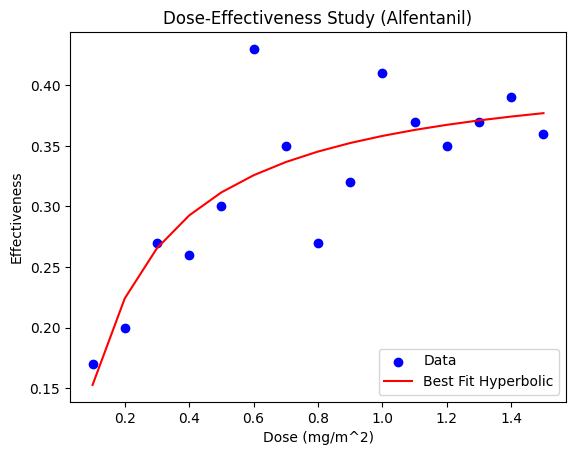

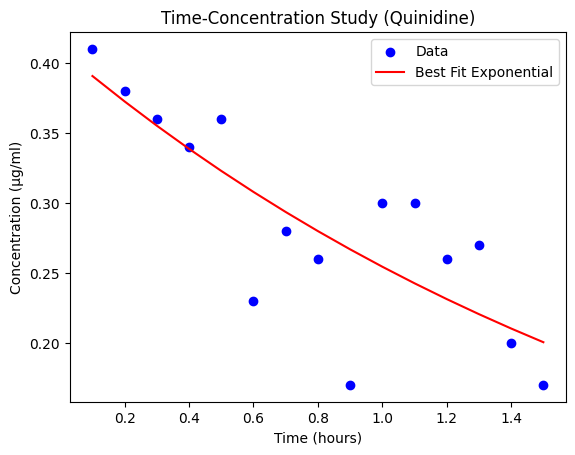

In [11]:
# Plot for Dose-Effectiveness Study
plt.figure()
plt.scatter(x_dose, y_effectiveness, label="Data", color='blue')
plt.plot(x_dose, hyperbolic(x_dose, *params_hyperbolic), label="Best Fit Hyperbolic", color='red')
plt.xlabel("Dose (mg/m^2)")
plt.ylabel("Effectiveness")
plt.title("Dose-Effectiveness Study (Alfentanil)")
plt.legend()
plt.show()

# Plot for Time-Concentration Study
plt.figure()
plt.scatter(x_time, y_concentration, label="Data", color='blue')
plt.plot(x_time, exponential(x_time, *params_exponential), label="Best Fit Exponential", color='red')
plt.xlabel("Time (hours)")
plt.ylabel("Concentration (μg/ml)")
plt.title("Time-Concentration Study (Quinidine)")
plt.legend()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.interpolate import make_interp_spline

# Fit the models
params_hyperbolic, _ = curve_fit(hyperbolic, x_dose, y_effectiveness)
params_exponential, _ = curve_fit(exponential, x_time, y_concentration)

# Generate smooth lines with cubic splines
x_dose_smooth = np.linspace(x_dose.min(), x_dose.max(), 300)
x_time_smooth = np.linspace(x_time.min(), x_time.max(), 300)

spline_effectiveness = make_interp_spline(x_dose, y_effectiveness)(x_dose_smooth)
spline_concentration = make_interp_spline(x_time, y_concentration)(x_time_smooth)

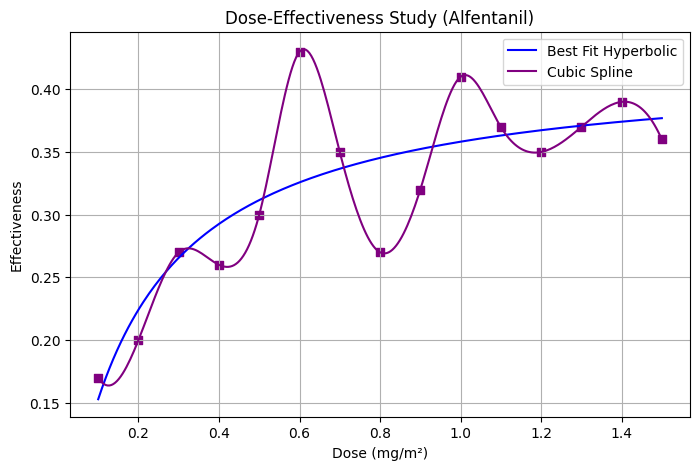

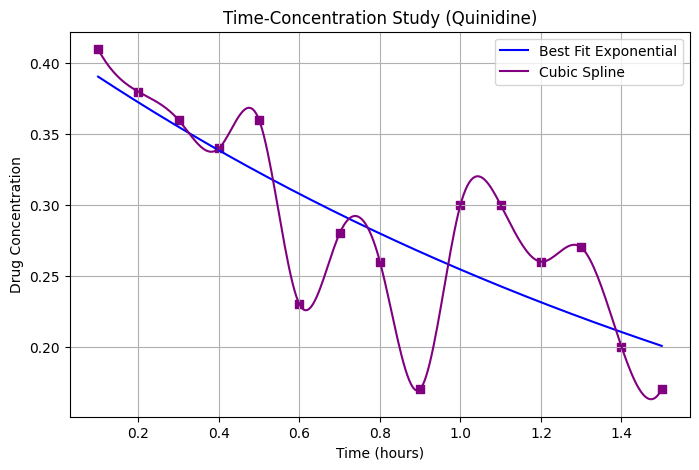

In [15]:
# Plot for Dose-Effectiveness Study
plt.figure(figsize=(8, 5))
plt.plot(x_dose_smooth, hyperbolic(x_dose_smooth, *params_hyperbolic), label="Best Fit Hyperbolic", color='blue')
plt.plot(x_dose_smooth, spline_effectiveness, label="Cubic Spline", color='purple')
plt.scatter(x_dose, y_effectiveness, color='purple', marker='s')  # Data points
plt.xlabel("Dose (mg/m²)")
plt.ylabel("Effectiveness")
plt.title("Dose-Effectiveness Study (Alfentanil)")
plt.legend()
plt.grid(True)
plt.show()

# Plot for Time-Concentration Study
plt.figure(figsize=(8, 5))
plt.plot(x_time_smooth, exponential(x_time_smooth, *params_exponential), label="Best Fit Exponential", color='blue')
plt.plot(x_time_smooth, spline_concentration, label="Cubic Spline", color='purple')
plt.scatter(x_time, y_concentration, color='purple', marker='s')  # Data points
plt.xlabel("Time (hours)")
plt.ylabel("Drug Concentration")
plt.title("Time-Concentration Study (Quinidine)")
plt.legend()
plt.grid(True)
plt.show()
